<a href="https://colab.research.google.com/github/reema-dass26/Electricity_utilization_data_management/blob/main/energy_disaggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install seaborn matplotlib


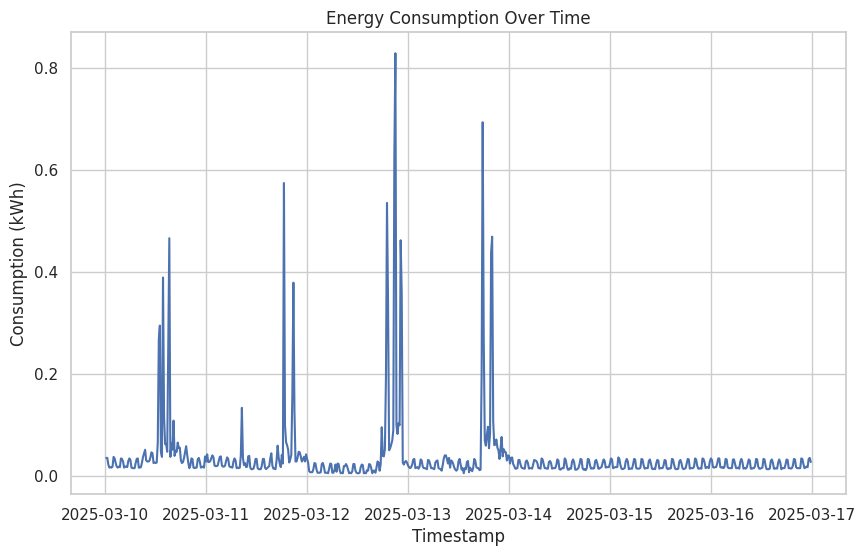

In [ ]:
import pandas as pd
import numpy as np

# Load your energy data
data = pd.read_excel("energy_data2.xlsx", sheet_name="Sheet1")

# Ensure Timestamp is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Convert 'Consumption' column to numeric (in case it’s not already)
data['Consumption'] = pd.to_numeric(data['Consumption'], errors='coerce')

# Calculate the consumption change (difference between consecutive periods)
data['Consumption_Change'] = data['Consumption'].diff()

# Remove rows with missing consumption change
data = data.dropna(subset=['Consumption_Change'])

# Visualize Consumption and Consumption Change
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Consumption'])
plt.xlabel('Timestamp')
plt.ylabel('Consumption (kWh)')
plt.title('Energy Consumption Over Time')
plt.show()


In [ ]:
# Create new features
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek

# Calculate a rolling average of consumption to smooth out sudden spikes
data['Rolling_Avg_Consumption'] = data['Consumption'].rolling(window=3).mean()


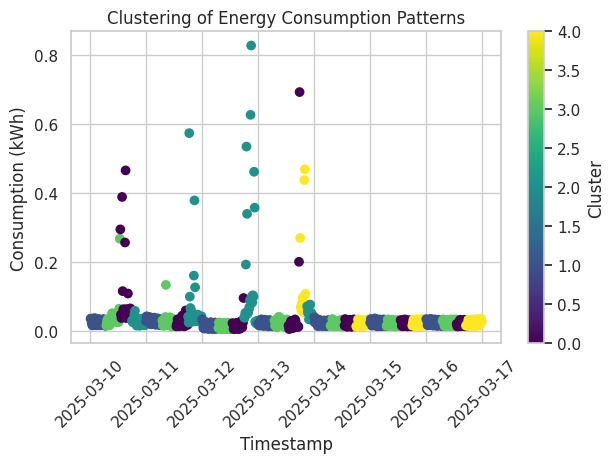

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X = data[['Consumption', 'Consumption_Change', 'Hour', 'Day_of_Week']].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assume 5 categories: cooking, washing, standby, etc.
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering result (you can refine this based on your data)
import matplotlib.pyplot as plt
plt.scatter(data['Timestamp'], data['Consumption'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Consumption (kWh)')
plt.title('Clustering of Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# Manually label each cluster after reviewing their patterns
cluster_labels = {
    0: 'Cooking',
    1: 'Washing',
    2: 'Lights',
    3: 'Standby',
    4: 'Others'
}

data['Category'] = data['Cluster'].map(cluster_labels)


In [ ]:
# Calculate total consumption by category
category_consumption = data.groupby('Category')['Consumption'].sum()

# Calculate the percentage consumption for each category
total_consumption = category_consumption.sum()
category_percentage = (category_consumption / total_consumption) * 100

# Display the report
print("Consumption by Category (in %):")
print(category_percentage)


Consumption by Category (in %):
Category
Cooking    22.256459
Lights     30.406099
Others     13.917200
Standby    16.220273
Washing    17.199968
Name: Consumption, dtype: float64


In [ ]:
# Generate a summary report
report = pd.DataFrame({
    'Category': category_percentage.index,
    'Consumption (%)': category_percentage.values
})

# Optionally, save the report to a CSV file
report.to_csv('energy_consumption_report.csv', index=False)

# Display the report
print(report)


  Category  Consumption (%)
0  Cooking        22.256459
1   Lights        30.406099
2   Others        13.917200
3  Standby        16.220273
4  Washing        17.199968


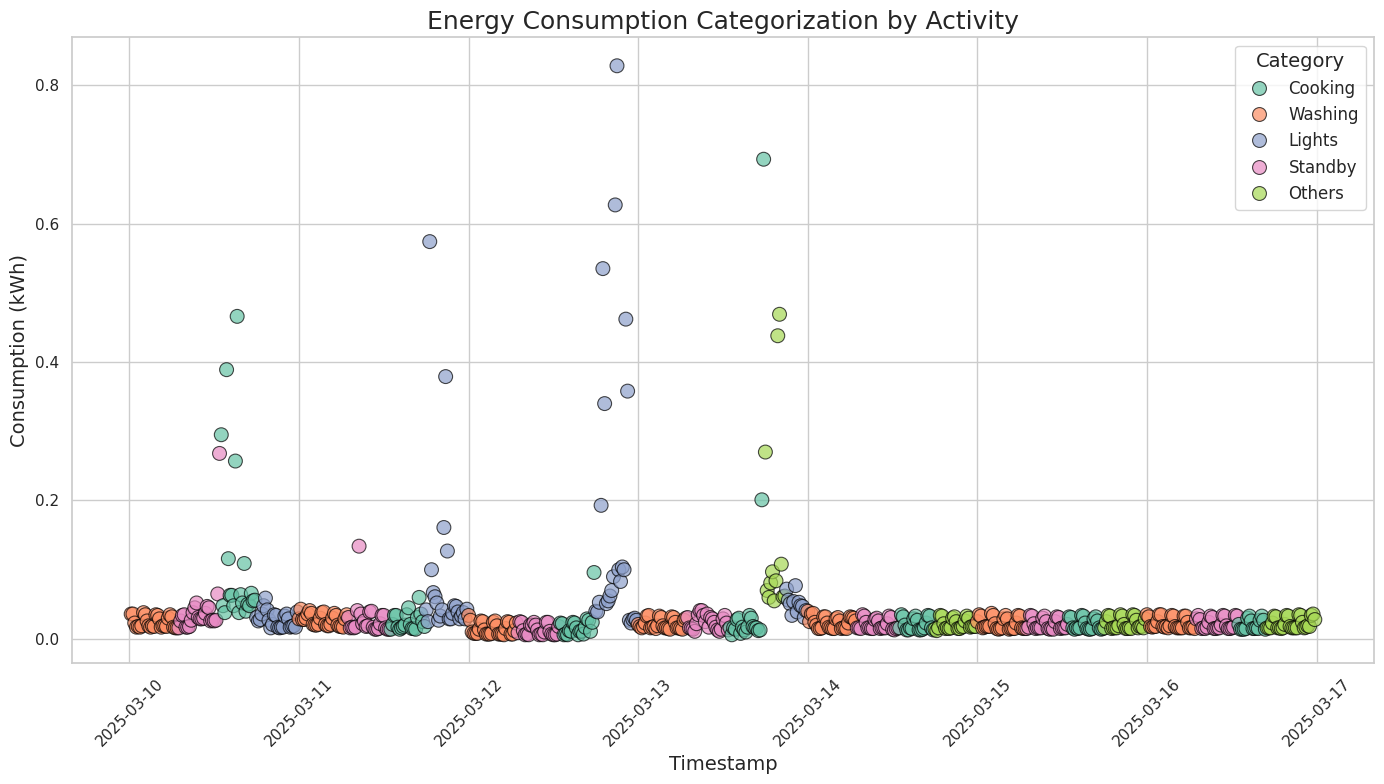

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Category' is categorical for better color handling in Seaborn
data['Category'] = pd.Categorical(data['Category'], categories=['Cooking', 'Washing', 'Lights', 'Standby', 'Others'])

# Set the plot style
sns.set(style="whitegrid")

# Create the plot: Time on x-axis and Consumption on y-axis, color by category
plt.figure(figsize=(14, 8))

# Using Seaborn's scatterplot for a fancy look
sns.scatterplot(data=data, x='Timestamp', y='Consumption', hue='Category', palette='Set2', s=100, edgecolor='black', alpha=0.7)

# Add a title, labels, and legend
plt.title('Energy Consumption Categorization by Activity', fontsize=18)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Consumption (kWh)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Category', title_fontsize=14, fontsize=12)

# Display the plot with tight layout
plt.tight_layout()
plt.show()


Confidence Rates for each Category:
Category
Cooking    22.256459
Washing    17.199968
Lights     30.406099
Standby    16.220273
Others     13.917200
Name: Consumption, dtype: float64


<ipython-input-41-660bb37ef9e7>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_consumption = data.groupby('Category')['Consumption'].sum()


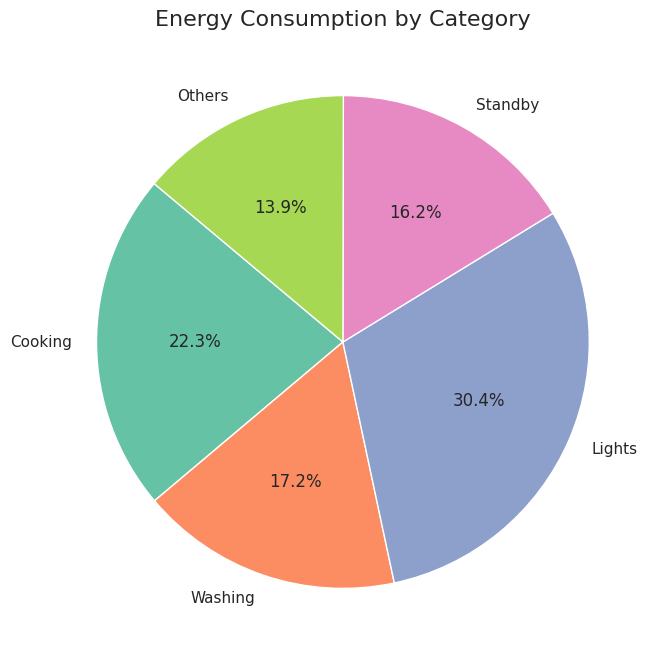

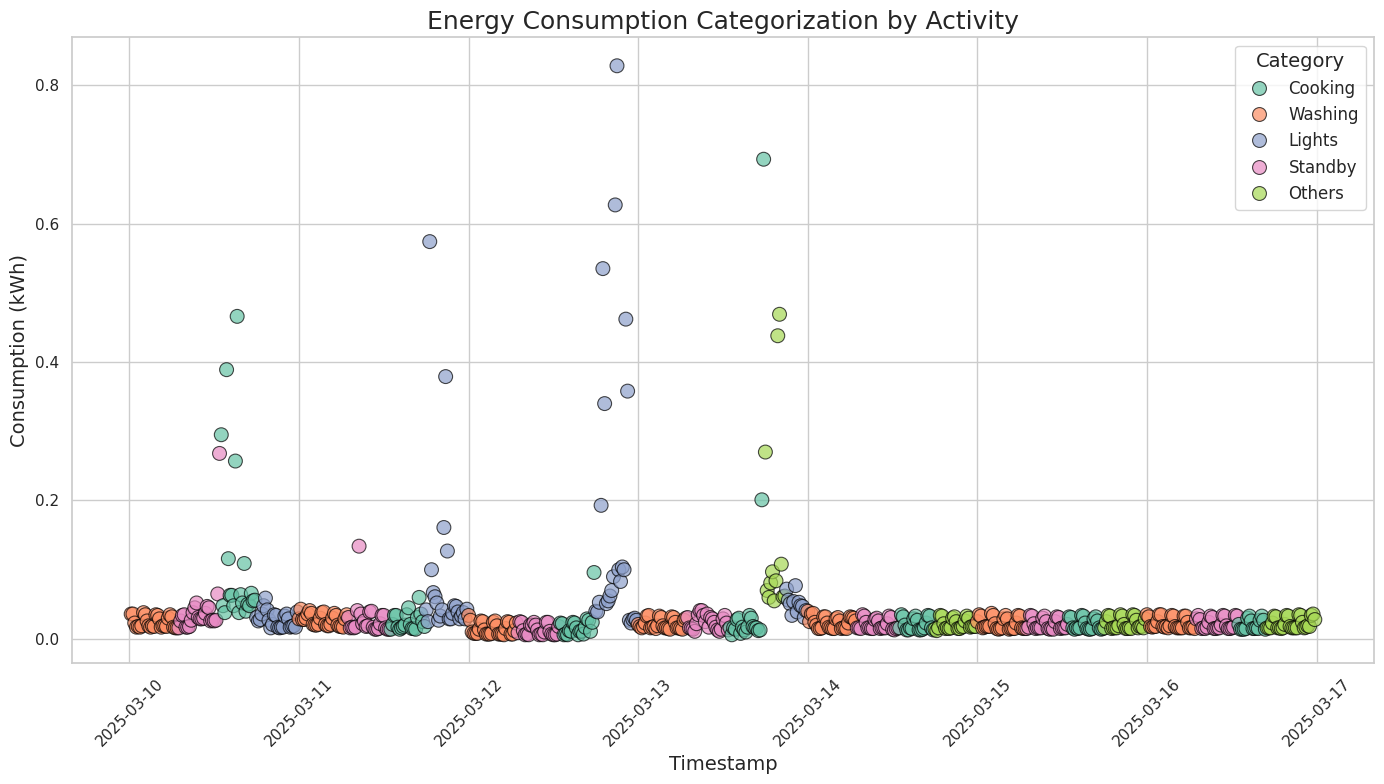

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


total_consumption = data['Consumption'].sum()

# Calculate the total consumption per category
category_consumption = data.groupby('Category')['Consumption'].sum()

# Calculate confidence rates as the percentage of total consumption per category
category_confidence_rate = (category_consumption / total_consumption) * 100

# Display confidence rates
print("Confidence Rates for each Category:")
print(category_confidence_rate)

# Plotting a Pie Chart for Category Proportions
plt.figure(figsize=(8, 8))
plt.pie(category_confidence_rate, labels=category_confidence_rate.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(category_confidence_rate)))
plt.title('Energy Consumption by Category', fontsize=16)
plt.show()

# Set the plot style for scatter plot
sns.set(style="whitegrid")

# Create a scatterplot: Time on x-axis and Consumption on y-axis, color by category
plt.figure(figsize=(14, 8))

# Using Seaborn's scatterplot for a fancy look
sns.scatterplot(data=data, x='Timestamp', y='Consumption', hue='Category', palette='Set2', s=100, edgecolor='black', alpha=0.7)

# Add a title, labels, and legend
plt.title('Energy Consumption Categorization by Activity', fontsize=18)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Consumption (kWh)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Category', title_fontsize=14, fontsize=12)

# Display the plot with tight layout
plt.tight_layout()
plt.show()
